# One simple way to make a dent in climate change

An important tool for fighting climate change will involve ordinary citizens adopting a lifestyle which generates less waste, uses more recyclable materials like aluminum and glass, and makes composting a routine household option. But even this presents a massive technological, cultural, and policy challenge.


Luckily, today we don't have to struggle to imagine what that lifestyle might look like.  A pioneering community of people have built social media followings by proving that the world can exist without generating lbs and lbs waste. And right now, that might seem incredible.  You may look at your trash can bursting at the seams.  You may remember struggling to drag your trash bags out to the curb right before the pickup date, and think "There is no other way".  But I offer this curated list of instagrams, twitters, youtubes, and of course, the subreddits [r/ZeroWaste](https://www.reddit.com/r/ZeroWaste), [r/BuyItForLife](https://www.reddit.com/r/BuyItForLife/) and [r/Minimalism](https://www.reddit.com/r/minimalism) for proof that this subculture is real.

|instagram|twitter|youtube|
|---|---|---|
|[@zerowastechef](https://www.instagram.com/zerowastechef)|[@zerowastehome](https://twitter.com/zerowastehome)|[Ecoboost](https://www.youtube.com/channel/UC3pE1IqHqbdf3vqtaALL4nA/videos)|
|[@going.zero.waste](https://www.instagram.com/going.zero.waste)|[@zerowastechi](https://twitter.com/zerowastechi)|[Trash is for Tossers](https://www.youtube.com/channel/UCgjw6tZNyjR_8zIFDsIPpww)|
|[@zerowastenerd](https://www.instagram.com/zerowastenerd/)|[@TheMinimalists](https://twitter.com/TheMinimalists)|[Living Waste Free](https://www.youtube.com/channel/UCfYFvffR5LbJLSIzhKWD8ig/videos)|

As a skeptic, it is hard to believe all this could be more than a fad for a group of strange people doing strange things. How much waste is one person actually generating? And, what kind of impact could such dramatic lifestyle changes by one person have towards fighting climate change?


And that is how the cultural question turns into a math problem. The questions are:
 - How much waste does the standard american generate? 
 - How much CO<sub>2</sub> equivalent emmisions are generated from that waste?

Finally, since amounts of CO<sub>2</sub> is not the easiest metric to visualize, I am going to convert it into the equivalent generated by a gallon of gasoline. I hope to show how many gallons of gasoline are equivalent to changing one person's lifestyle for one day.

### How much waste does the standard american generate?

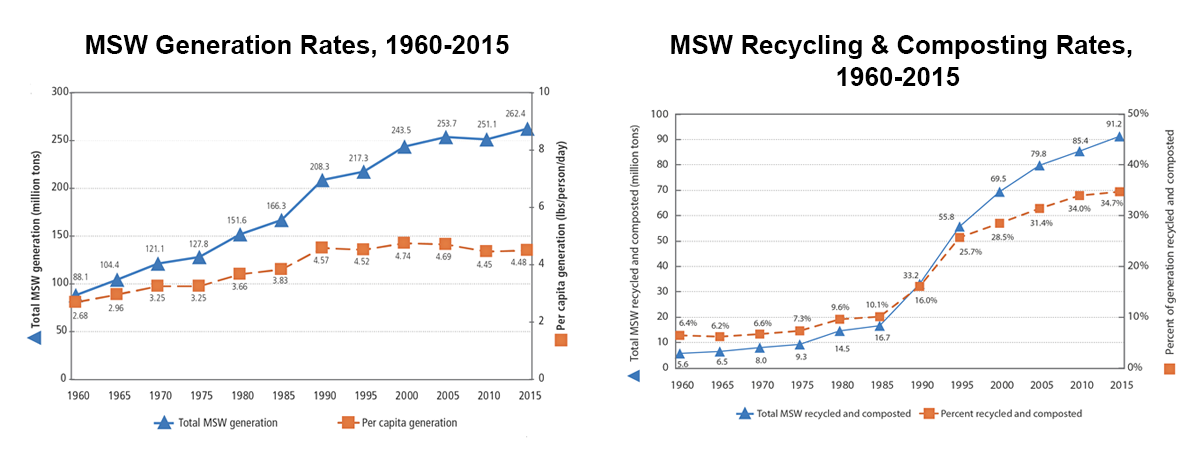

In [1]:
from IPython.display import Image
Image(filename='/Users/phebepolk/Documents/zabble/EPA Chart.png')

[<sub>EPA SOURCE</sub>](https://www.epa.gov/facts-and-figures-about-materials-waste-and-recycling/national-overview-facts-and-figures-materials#NationalPicture)


According to data collected by the EPA in 2015, the average american generated 4.48 lbs. of municipal waste every day.  The average person sends 2.93 lbs to the landfill and just 1.55 lbs to recycling or compost.  To visualize the relative size of that, I created the following bar chart.

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/phebepolk/Documents/zabble/summary_data_table.csv')

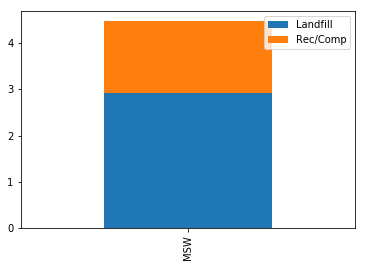

In [3]:
series = pd.Series([2.93, 1.55], index=['Landfill', 'Rec/Comp'], name='MSW')
pd.DataFrame(series).T.plot.bar(stacked=True);

As you can see, the average american is sending two times as much waste to the landfill as to the recycling and compost combined.  This is the **"Current State"** of waste.  Looking at the trends, it is easy to imagine both a **"Future State"** where the amount recycled and the amount sent to a landfill is flipped and a **"Past State"** if Americans return to 10% recycling rates because recycling becomes harder.  And what about a minimal or zero waste future? Let's outline the scenarios.

#### Potential Futures
|Potential Future Scenarios|Landfill|Recycle / Compost|Eliminated|
|---|---|---|---|
|**Current State**| 2.93 lbs | 1.55 lbs| 0 lbs|
|**Future State**| 1.55 lbs | 2.93 lbs| 0 lbs|
|**Past State**| 4.03 lbs | 0.45 lbs| 0 lbs|
|**Zero Waste** |0 lbs|0 lbs|4.4 lbs|

### How much CO<sub>2</sub> equivalent emmisions are generated from that waste?

The amount of CO<sub>2</sub> equivalent emmisions is relative to the type of material. Scientists at the EPA developed the WARM model to caculate emmissions based on different material types.

Surprisingly, the two materials which generate the most CO<sub>2</sub> equivalent emmisions in a landfill are textbooks and office paper.  The material that generates the least is PLA also known as biodegradable plastic. Drywall generates the most CO<sub>2</sub> equivalent emmisions when recyled and aluminum cans generates the least. Interestingly, the range for landfill materials is 5.04, the range for recycled materials is 9.14, but the range for composting 0.03.

To show how widely the CO<sub>2</sub> equivalent emmisions can change, I created a small calculator. If you select the different values, you will see the totals change dramatically based on which scenario is being described. 

In [9]:
gas = 0.008887
a = widgets.Dropdown(
    options=["Highest","Median","Lowest"],
    value="Median",
    description='Landfill Material:',
    disabled=False,
    style=dict(description_width='initial')
)
b = widgets.Dropdown(
    options=["Highest","Median","Lowest"],
    value="Median",
    description='Recycled Material:',
    disabled=False,
    style=dict(description_width='initial')
)
c = widgets.ToggleButton(False, description='Convert to Gasoline',
    style=dict(description_width='initial'))
def f(x, y,z):
    r = {"Highest":2,"Median":1,"Lowest":0}
    factor_l = [-1.6426151092788002, 0.020254519141195998, 3.39780612043173]
    factor_r = [-9.107799577537099, -2.5041000762874197, 0.0282501904071107]
    scenario = pd.DataFrame(np.array([["Current State",2.93,1.55,0],["Future State",1.55,2.93,0],["Past State",4.03,0.45,0], ["Zero Waste",0,0,4.48]]), columns = ["Scenarios","Landfill","Rec/Comp","Never Produced"])
    scenario['Landfill'] = scenario['Landfill'].astype('float')*factor_l[r[x]]/2000 /(gas if z else 1)
    scenario["Rec/Comp"] = scenario["Rec/Comp"].astype('float')*factor_r[r[y]]/2000 /(gas if z else 1)
    scenario["Never Produced"] = scenario["Never Produced"].astype('float')*df["source_reduction"].median()/2000 /(gas if z else 1)
    scenario['Total'] = scenario['Landfill'] + scenario["Rec/Comp"] + scenario["Never Produced"]
    print(scenario)
    scenario.set_index("Scenarios",drop=True,inplace=True)
    scenario['Total'].plot.bar()
    

out = widgets.interactive_output(f,{'x':a,'y':b, 'z':c})
widgets.VBox([widgets.HBox([a, b, c]),out])

#### Greenhouse Gas Emmisions from Median materials

       Scenarios  Landfill  Rec/Comp  Never Produced     Total
0  Current State  0.000027 -0.001761       -0.000000 -0.001734
1   Future State  0.000014 -0.003328       -0.000000 -0.003314
2     Past State  0.000037 -0.000511       -0.000000 -0.000474
3     Zero Waste  0.000000 -0.000000       -0.005026 -0.005026


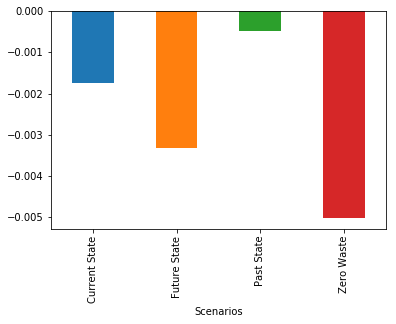

In [15]:

z=False
r = {"Highest":2,"Median":1,"Lowest":0}
factor_l = [-1.6426151092788002, 0.020254519141195998, 3.39780612043173]
factor_r = [-9.107799577537099, -2.5041000762874197, 0.0282501904071107]
scenario = pd.DataFrame(np.array([["Current State",2.93,1.55,0],["Future State",1.55,2.93,0],["Past State",4.03,0.45,0], ["Zero Waste",0,0,4.48]]), columns = ["Scenarios","Landfill","Rec/Comp","Never Produced"])
scenario['Landfill'] = scenario['Landfill'].astype('float')*factor_l[1]/2204.6 /(gas if z else 1)
scenario["Rec/Comp"] = scenario["Rec/Comp"].astype('float')*factor_r[1]/2204.6 /(gas if z else 1)
scenario["Never Produced"] = scenario["Never Produced"].astype('float')*df["source_reduction"].median()/2204.6 /(gas if z else 1)
scenario['Total'] = scenario['Landfill'] + scenario["Rec/Comp"] + scenario["Never Produced"]
print(scenario)
scenario.set_index("Scenarios",drop=True,inplace=True)
scenario['Total'].plot.bar();

#### Equivalent Gallons of Gas from Median materials

       Scenarios  Landfill  Rec/Comp  Never Produced     Total
0  Current State  0.003029 -0.198106       -0.000000 -0.195077
1   Future State  0.001602 -0.374485       -0.000000 -0.372883
2     Past State  0.004166 -0.057515       -0.000000 -0.053349
3     Zero Waste  0.000000 -0.000000       -0.565491 -0.565491


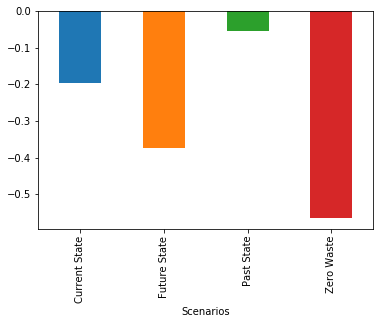

In [16]:

z=True
r = {"Highest":2,"Median":1,"Lowest":0}
factor_l = [-1.6426151092788002, 0.020254519141195998, 3.39780612043173]
factor_r = [-9.107799577537099, -2.5041000762874197, 0.0282501904071107]
scenario = pd.DataFrame(np.array([["Current State",2.93,1.55,0],["Future State",1.55,2.93,0],["Past State",4.03,0.45,0], ["Zero Waste",0,0,4.48]]), columns = ["Scenarios","Landfill","Rec/Comp","Never Produced"])
scenario['Landfill'] = scenario['Landfill'].astype('float')*factor_l[1]/2204.6 /(gas if z else 1)
scenario["Rec/Comp"] = scenario["Rec/Comp"].astype('float')*factor_r[1]/2204.6 /(gas if z else 1)
scenario["Never Produced"] = scenario["Never Produced"].astype('float')*df["source_reduction"].median()/2204.6 /(gas if z else 1)
scenario['Total'] = scenario['Landfill'] + scenario["Rec/Comp"] + scenario["Never Produced"]
print(scenario)
scenario.set_index("Scenarios",drop=True,inplace=True)
scenario['Total'].plot.bar();

As you can see, recycling more can significantly impact the amount of greenhouse gases an individual creates.  Recycling programs really are reducing CO<sub>2</sub> emissions.  We have a choice between a past with less recycling or a future with more recycling and less stuff.

Governments and municipal waste companies can make these transitions easier through education, monitoring, and incentives.  Routine waste audits can show the effectiveness of a public education program, can both demonstrate and drive change, and provide feedback and incentives for residents who embrace change.  Zabble is a simple all-in-one online platform to collect, monitor, and report results for a wide variety of waste audits. 